In [2]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import os, sys
sys.path.append('..')
import common, sql
import pandas as pd

In [24]:
q='''select distinct toolId as tool, v.id
    from npmAlert nA
    join vulnerability v on nA.vulnerabilityId = v.id
    where toolId in (2,4,5)
    and v.cveId is not null'''
fullDf= sql.pd_read_sql(q)

In [25]:
l=[]
for tool, df in fullDf.groupby('tool'):
    s = set(df.id)
    l.append(s)

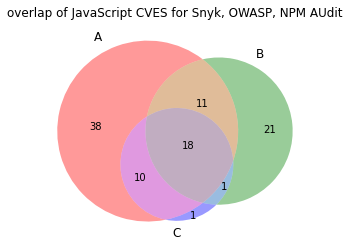

In [46]:
v= venn3(l)
plt.title('overlap of JavaScript CVES for Snyk, OWASP, NPM AUdit')
plt.savefig('jscves.png')

In [48]:
q='''select distinct toolId as tool, d.packageId as id
        from npmAlert nA
        join dependency d on nA.dependencyId = d.id
        where toolId in (2,4,5);'''
fullDf= sql.pd_read_sql(q)
l=[]
for tool, df in fullDf.groupby('tool'):
    s = set(df.id)
    l.append(s)

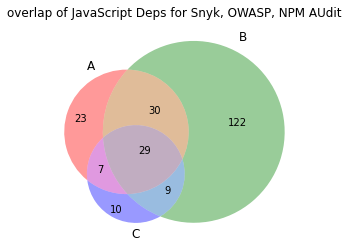

In [49]:
v= venn3(l)
plt.title('overlap of JavaScript Deps for Snyk, OWASP, NPM AUdit')
plt.savefig('jsdeps.png')

In [57]:
q='''select distinct toolId as tool, v.id
    from mavenAlert mA
    join vulnerability v on mA.vulnerabilityId = v.id
    where toolId in (1,2,4)
    and v.cveId is not null'''
fullDf= sql.pd_read_sql(q)
l=[]
for tool, df in fullDf.groupby('tool'):
    s = set(df.id)
    l.append(s)

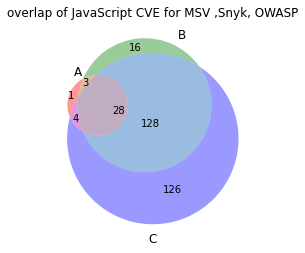

In [58]:
v= venn3(l)
plt.title('overlap of JavaScript CVE for MSV ,Snyk, OWASP')
plt.savefig('javacves.png')

In [59]:
q='''select distinct toolId as tool, d.packageId as id
    from mavenAlert mA
    join dependency d on mA.dependencyId = d.id
    where toolId in (1,2,4)'''
fullDf= sql.pd_read_sql(q)
l=[]
for tool, df in fullDf.groupby('tool'):
    s = set(df.id)
    l.append(s)

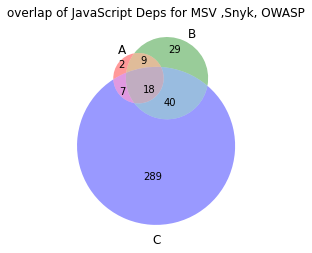

In [60]:
v= venn3(l)
plt.title('overlap of JavaScript Deps for MSV ,Snyk, OWASP')
plt.savefig('javadeps.png')